# Prepare utils

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def pose_spherical(theta, phi, r):
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)
    return x, y, z

def fibonacci_sphere(samples=1000):
    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
        radius = math.sqrt(1 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        points.append(cart2sph(x, y, z))

    return points

def cart2sph(x, y, z):
    rho = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arccos(z / rho)
    theta = np.arctan2(y, x)
    return theta, phi, rho

In [3]:
def visualize(n_points):
    poses = [pose_spherical(theta, phi, -1.307) for theta, phi, _ in fibonacci_sphere(n_points)]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for pose in poses:
        ax.scatter(*pose, color='b', s=5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Poses on Sphere')

    plt.show()
    plt.close()

# Visualize

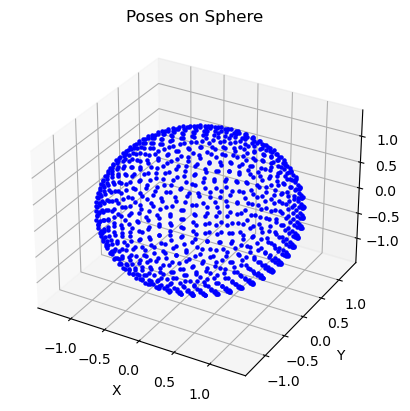

In [4]:
n_points = 1000
visualize(n_points)

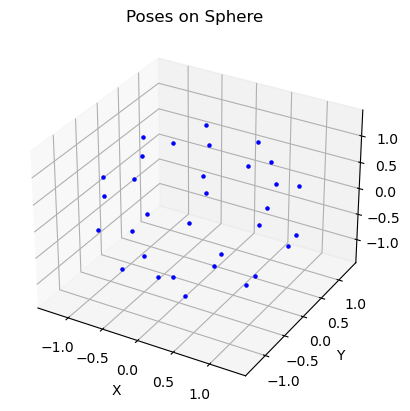

In [5]:
n_points = 32
visualize(n_points)